# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from wordcloud import WordCloud
import string

# Import DataSet

In [2]:
vac_df = pd.read_csv('../input/covid19-vaccines-list-countrywise/Covid 19 Vaccines Location.csv')

# Exploratory data analysis

In [3]:
vac_df.head()

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",27-12-2021,World Health Organization,https://covid19.who.int/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",28-12-2021,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",21-12-2021,World Health Organization,https://covid19.who.int/
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",12-12-2021,World Health Organization,https://worldhealthorg.shinyapps.io/EURO_COVID...
4,Angola,AGO,Oxford/AstraZeneca,30-12-2021,World Health Organization,https://africacdc.org/covid-19-vaccination/


In [4]:
print("Number of rows is = ", vac_df.shape[0], " \nNumber of columns is = " , vac_df.shape[1]) 

Number of rows is =  223  
Number of columns is =  6


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#0142A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"><lr>Interactive geographic scatter plot for vaccine, source name with date</lr>
                            <li>Map can be rotated by dragging the mouse</li>
    </p></div>
    


In [5]:
map_fig = px.scatter_geo(vac_df,locations='iso_code',projection = 'orthographic',color='location',opacity = 1,
                        hover_name='location',hover_data=['vaccines','source_name','last_observation_date'])
map_fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#0142A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">3D plot of vaccine name with location and source of vaccine</p></div>
    



In [6]:
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(vac_df, x='location', y='vaccines', z='source_name', color='location')
fig.show()

<Figure size 720x216 with 0 Axes>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9942A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Top 10 Sources of Vaccine</p></div>  

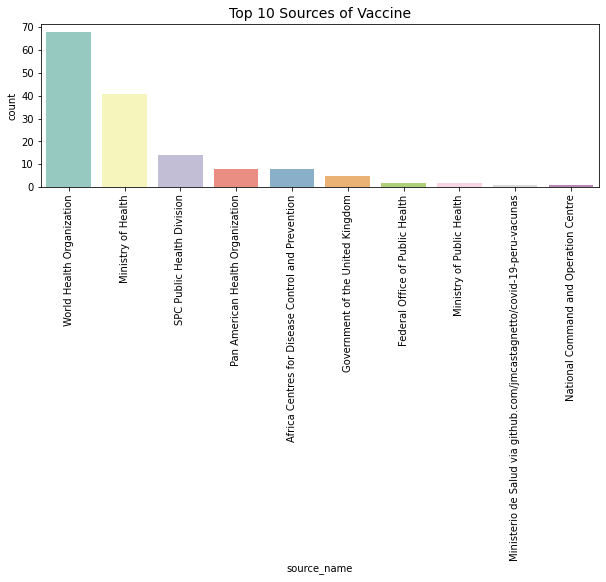

In [7]:
plt.figure(figsize=(10, 3))
plt.title('Top 10 Sources of Vaccine', fontsize=14)
sns.countplot(x = "source_name",data=vac_df, palette="Set3",order=vac_df.source_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4942A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Creating a new dataframe df1 with only Vaccine Name and Location</p></div>

In [8]:
df1 = vac_df['vaccines'].str.split(',', expand=True)
df1.columns = ['vaccine_1','vaccine_2','vaccine_3','vaccine_4','vaccine_5','vaccine_6','vaccine_7','vaccine_8']
df1.head(3)

,vaccine_1,vaccine_2,vaccine_3,vaccine_4,vaccine_5,vaccine_6,vaccine_7,vaccine_8
0,Johnson&Johnson,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,None,None,None,None
1,Oxford/AstraZeneca,Pfizer/BioNTech,Sinovac,Sputnik V,None,None,None,None
2,Oxford/AstraZeneca,Sinopharm/Beijing,Sinovac,Sputnik V,None,None,None,None


In [9]:
def colname():
    df_v2.columns = col_name

In [10]:
df_v1 = pd.concat([df1['vaccine_1'],vac_df['location']],axis=1)
col_name = ["Vaccine_Name","Location"]
df_v1.columns = col_name


for i, column in enumerate(df1.columns):
    if i != 0:
        col = df1.columns[i]
        
        df_v2 = pd.concat([df1[df1.columns[i]],vac_df['location']],axis=1)
        colname()   
        
        df_v1 = pd.concat([df_v1, df_v2], ignore_index=True)
        del df_v2


### Now df_v1 have all Vaccine Name with Location

In [11]:
df_v1['Vaccine_Name'] =df_v1['Vaccine_Name'].str.strip()
df_v1

,Vaccine_Name,Location
0,Johnson&Johnson,Afghanistan
1,Oxford/AstraZeneca,Albania
2,Oxford/AstraZeneca,Algeria
3,Moderna,Andorra
4,Oxford/AstraZeneca,Angola
...,...,...
1779,None,Wales
1780,None,Wallis and Futuna
1781,None,Yemen
1782,None,Zambia


In [12]:
print("Number of rows in new dataframe is = ", df_v1.shape[0], " \nNumber of columns in new dataframe is = " , df_v1.shape[1]) 
print("\n\nExpected Number of Rows is ",223*8 )

Number of rows in new dataframe is =  1784  
Number of columns in new dataframe is =  2


Expected Number of Rows is  1784


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9002E0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Missing Value Analysis for New DataFrame</p></div>  

In [13]:
df_v1.isnull().sum()

Vaccine_Name    1063
Location           0
dtype: int64

There are 1063 None Values for Vaccine_Name, we can also use a missing value heat map for same.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A002E0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Heat Map for Missing Value</p></div>   

<AxesSubplot:>

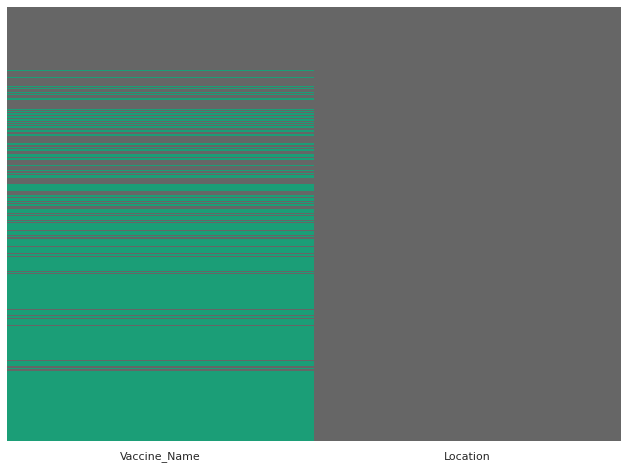

In [14]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df_v1.isnull(),yticklabels=False,cbar=False,cmap="Dark2_r")

We can drop all rows which have missing values

In [15]:
df_v1.dropna(inplace=True)
df_v1.shape

(721, 2)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#994AA0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">Analysis of Locations wise distribution of each Vaccines </p></div>   

# Number of Location where each vaccine is available/provided

In [16]:
pd.Series(df_v1["Vaccine_Name"].value_counts()).rename_axis("Vaccine_Name").to_frame('Number of Locations Used')

,Number of Locations Used
Vaccine_Name,
Oxford/AstraZeneca,183
Pfizer/BioNTech,150
Sinopharm/Beijing,86
Moderna,83
Johnson&Johnson,78
Sputnik V,59
Sinovac,46
Covaxin,9
CanSino,7


# LocationWise Distribution Rate of Vaccine

In [17]:
pd.crosstab(df_v1.Vaccine_Name,df_v1.Location,normalize = "index" ).style.background_gradient(cmap='Dark2_r')

# Vaccine with each Location 

In [18]:
df_v1.groupby('Vaccine_Name').apply(display)

,Vaccine_Name,Location
49,Abdala,Cuba
142,Abdala,Nicaragua
216,Abdala,Venezuela
217,Abdala,Vietnam


,Vaccine_Name,Location
93,COVIran Barekat,Iran


,Vaccine_Name,Location
7,CanSino,Argentina
40,CanSino,Chile
41,CanSino,China
58,CanSino,Ecuador
121,CanSino,Malaysia
127,CanSino,Mexico
151,CanSino,Pakistan


,Vaccine_Name,Location
26,Covaxin,Botswana
38,Covaxin,Central African Republic
43,Covaxin,Comoros
91,Covaxin,India
126,Covaxin,Mauritius
138,Covaxin,Nepal
155,Covaxin,Paraguay
316,Covaxin,Iran
374,Covaxin,Pakistan


,Vaccine_Name,Location
163,EpiVacCorona,Russia
205,EpiVacCorona,Turkmenistan


,Vaccine_Name,Location
0,Johnson&Johnson,Afghanistan
11,Johnson&Johnson,Austria
13,Johnson&Johnson,Bahamas
18,Johnson&Johnson,Belgium
19,Johnson&Johnson,Belize
...,...,...
221,Johnson&Johnson,Zambia
249,Johnson&Johnson,Botswana
350,Johnson&Johnson,Mexico
361,Johnson&Johnson,Nepal


,Vaccine_Name,Location
194,Medigen,Taiwan


,Vaccine_Name,Location
3,Moderna,Andorra
8,Moderna,Armenia
10,Moderna,Australia
15,Moderna,Bangladesh
22,Moderna,Bhutan
...,...,...
440,Moderna,Vietnam
472,Moderna,Botswana
573,Moderna,Mexico
584,Moderna,Nepal


,Vaccine_Name,Location
1,Oxford/AstraZeneca,Albania
2,Oxford/AstraZeneca,Algeria
4,Oxford/AstraZeneca,Angola
5,Oxford/AstraZeneca,Anguilla
6,Oxford/AstraZeneca,Antigua and Barbuda
...,...,...
663,Oxford/AstraZeneca,Vietnam
695,Oxford/AstraZeneca,Botswana
796,Oxford/AstraZeneca,Mexico
807,Oxford/AstraZeneca,Nepal


,Vaccine_Name,Location
9,Pfizer/BioNTech,Aruba
45,Pfizer/BioNTech,Cook Islands
72,Pfizer/BioNTech,Gabon
77,Pfizer/BioNTech,Gibraltar
88,Pfizer/BioNTech,Hong Kong
...,...,...
886,Pfizer/BioNTech,Vietnam
918,Pfizer/BioNTech,Botswana
1019,Pfizer/BioNTech,Mexico
1030,Pfizer/BioNTech,Nepal


,Vaccine_Name,Location
103,QazVac,Kazakhstan


,Vaccine_Name,Location
17,Sinopharm/Beijing,Belarus
32,Sinopharm/Beijing,Burundi
39,Sinopharm/Beijing,Chad
62,Sinopharm/Beijing,Equatorial Guinea
108,Sinopharm/Beijing,Kyrgyzstan
...,...,...
1056,Sinopharm/Beijing,Rwanda
1095,Sinopharm/Beijing,Tunisia
1109,Sinopharm/Beijing,Vietnam
1253,Sinopharm/Beijing,Nepal


,Vaccine_Name,Location
487,Sinopharm/Wuhan,China
879,Sinopharm/Wuhan,United Arab Emirates


,Vaccine_Name,Location
311,Sinovac,Hong Kong
427,Sinovac,Turkey
447,Sinovac,Albania
448,Sinovac,Algeria
458,Sinovac,Azerbaijan
471,Sinovac,Bosnia and Herzegovina
593,Sinovac,Northern Cyprus
596,Sinovac,Oman
644,Sinovac,Timor
659,Sinovac,Uruguay


,Vaccine_Name,Location
272,Soberana02,Cuba
985,Soberana02,Iran
1034,Soberana02,Nicaragua


,Vaccine_Name,Location
1085,Sputnik Light,Syria
1224,Sputnik Light,Laos
1257,Sputnik Light,Nicaragua
1490,Sputnik Light,Palestine


,Vaccine_Name,Location
83,Sputnik V,Guinea
240,Sputnik V,Belarus
299,Sputnik V,Ghana
308,Sputnik V,Guyana
327,Sputnik V,Kenya
331,Sputnik V,Kyrgyzstan
386,Sputnik V,Russia
393,Sputnik V,San Marino
452,Sputnik V,Antigua and Barbuda
518,Sputnik V,Gabon


,Vaccine_Name,Location
883,ZF2001,Uzbekistan
933,ZF2001,China


""


## Top 10 Location with mutiple vaccines

Text(0.5, 1.0, 'Locations with multiple Vaccines')

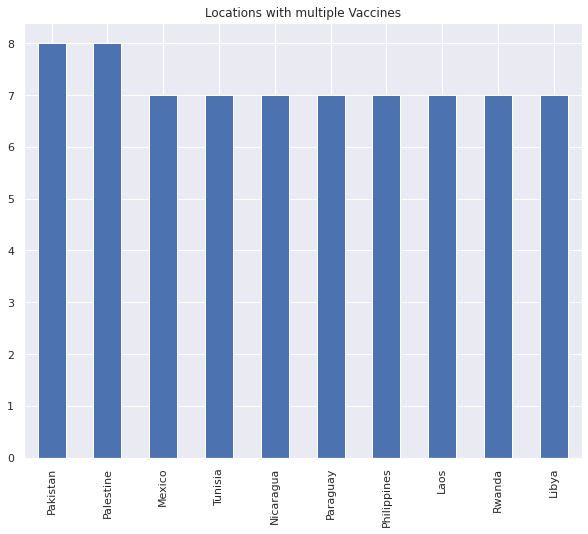

In [19]:
top_10 = df_v1['Location'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Locations with multiple Vaccines')

# Visualization of Vaccine Usage

<AxesSubplot:xlabel='Vaccine_Name'>

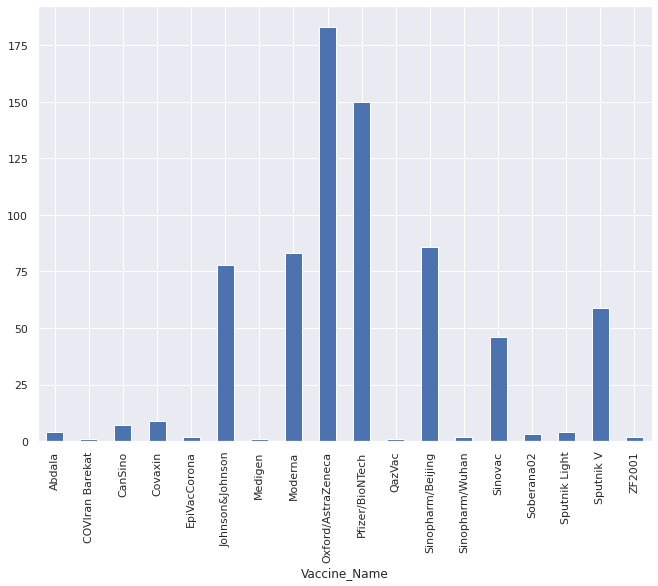

In [20]:
df_v1.groupby(['Vaccine_Name']).size().plot(kind = "bar")

# Vaccine usage percentage wise

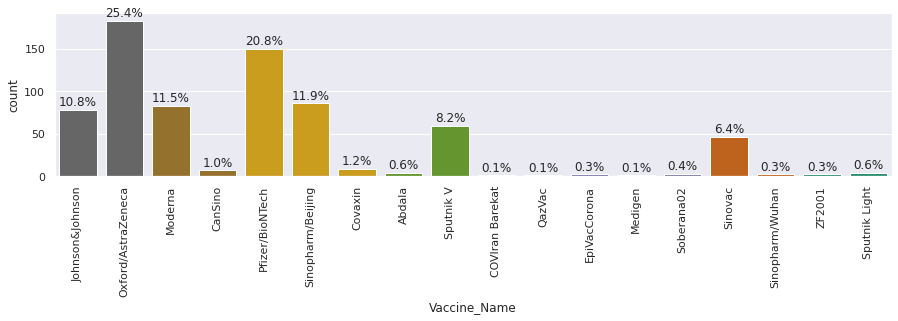

In [21]:
plt.figure(figsize=(15,3))
ax = sns.countplot(x = "Vaccine_Name",data=df_v1, palette="Dark2_r")
t = len(df_v1["Vaccine_Name"])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.xticks(rotation=90)
plt.show()

# Top 5 Vaccines

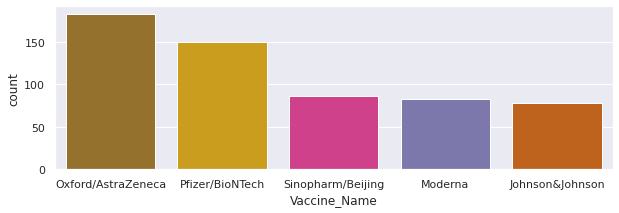

In [22]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Vaccine_Name",data=df_v1, palette="Dark2_r", order=df_v1.Vaccine_Name.value_counts().iloc[:5].index)
plt.show()

# WordCloud for Vaccines

In [23]:
vac_df['totalwords'] = vac_df['vaccines'].str.split().str.len()
vac_df['words'] = vac_df['vaccines'].str.split()
vac_df.head()

,location,iso_code,vaccines,last_observation_date,source_name,source_website,totalwords,words
0,Afghanistan,AFG,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",27-12-2021,World Health Organization,https://covid19.who.int/,4,"[Johnson&Johnson,, Oxford/AstraZeneca,, Pfizer..."
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",28-12-2021,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,5,"[Oxford/AstraZeneca,, Pfizer/BioNTech,, Sinova..."
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",21-12-2021,World Health Organization,https://covid19.who.int/,5,"[Oxford/AstraZeneca,, Sinopharm/Beijing,, Sino..."
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",12-12-2021,World Health Organization,https://worldhealthorg.shinyapps.io/EURO_COVID...,3,"[Moderna,, Oxford/AstraZeneca,, Pfizer/BioNTech]"
4,Angola,AGO,Oxford/AstraZeneca,30-12-2021,World Health Organization,https://africacdc.org/covid-19-vaccination/,1,[Oxford/AstraZeneca]


In [24]:
all_words = []

for text in vac_df['words']:
    text = [x.strip(string.punctuation) for x in text]
    all_words.append(text)
    
all_words[0]


text_new = [" ".join(text) for text in all_words]
final_text_word = " ".join(text_new)

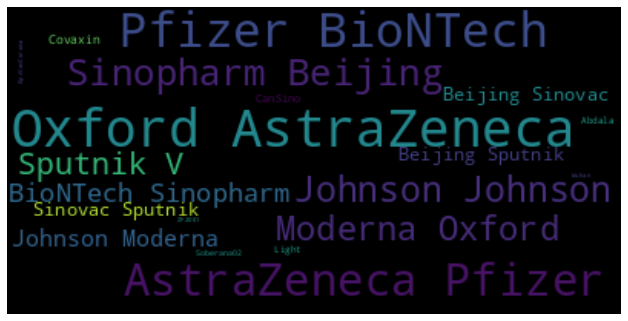

In [25]:
wordcloud = WordCloud().generate(str(final_text_word))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()